In [1]:
# mary

from neurotron import Cells, Train, Monitor
isa = isinstance

In [28]:
class Trainer(Train):
    def __init__(self,cells):
        super().__init__(cells)

    def prediction(self,context):
        if context in self._contexts:
            info = self._contexts[context]
            counters = []; total = 0
            for key in info:
                if not key in ['#','@']:
                    n,refer,idx = info[key]
                    total += n
                    counters.append(n)
                    #print('    statistics: %s:' % key,(counters,total))
            result = []; k = 0
            src = self.address(context)
            for key in info:
                if not key in ['#','@']:
                    ratio = counters[k]/total
                    k += 1
                    n,refer,idx = info[key]
                    dst = self.address(refer)
                    result.append((refer,ratio,src,dst))
                    #print('    predict(%g%%): %s ->'%(100*ratio,key),info[key])
            return result

    def predict(self,context):
        results = self.prediction(context)
        for prediction in results:
            refer,ratio,src,dst = prediction
            print('    %g%%: ->' % (100*ratio),refer,src,dst)
    
    def address(self,context):
        if context in self._contexts:
            info = self._contexts[context]
            #print('##### info:',info)
            m,n,d,s = self.cells.shape
            idx = train.code((info['@'][1])).list()[0]; 
            jdx = info['#'][0]
            assert len(idx) == len(jdx)
            kdx = [jdx[s]*m+idx[s] for s in range(len(idx))]
            #return ((m,n),idx,jdx,kdx)
            return kdx
        return None

    def learn(self,context):
        pass



In [31]:
cells = Cells('Mary')
train = Trainer(cells)
train('Lisa likes to paint .',2)
train('Lisa likes to dance .',8)
train('Mary likes to sing .',5)
#train.show()
train.predict('<Lisa likes to>')

    20%: -> <Lisa likes to paint> [6, 14, 16] [10, 12, 14]
    80%: -> <Lisa likes to dance> [6, 14, 16] [8, 12, 14]


In [32]:
train.predict('<Mary likes to>')

    100%: -> <Mary likes to sing> [7, 14, 16] [8, 14, 16]


In [9]:
cells = Cells('Mary')
train = Trainer(cells)
train('Mary likes to sing .')
train('John likes to dance .')
train('Lisa likes to paint .')
train('Lisa likes to sing .')
#train.show()

'<Lisa likes to sing .>'

In [5]:
train._contexts['<Lisa likes>']

{'#': ([2, 7, 8], '#3', 'likes'),
 '@': ['#3', [1 0 1; 0 1 0], '2.0-7.1-8.0'],
 'to': (2, '<Lisa likes to>', [3, 7, 8])}

In [6]:
#train.predict('<Lisa likes to>')

In [79]:
#cells.process('Mary')
#cells.process('likes')

In [86]:
adr = train.address('<Lisa likes to>');
print(adr)
adr = train.address('<Lisa likes to paint>');
print(adr)


##### info: {'#': ([3, 7, 8], '#3', 'to'), '@': ['#3', [1 0 1; 0 1 0], '3.0-7.1-8.0'], 'paint': (1, '<Lisa likes to paint>', [5, 6, 7]), 'sing': (1, '<Lisa likes to sing>', [4, 7, 8])}
((2, 9), [0, 1, 0], [3, 7, 8], [6, 15, 16])
##### info: {'#': ([5, 6, 7], '#1', 'paint'), '@': ['#1', [1 1 1; 0 0 0], '5.0-6.0-7.0'], '.': (1, '<Lisa likes to paint .>', [6, 7, 8])}
((2, 9), [0, 0, 0], [5, 6, 7], [10, 12, 14])


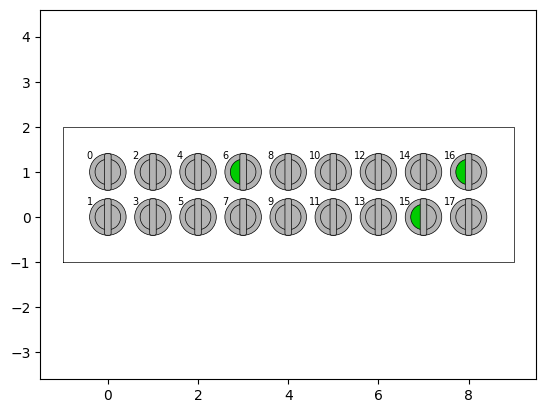

In [84]:

train.cells.X[6] = 1;
train.cells.X[15] = 1;
train.cells.X[16] = 1;
cells.plot(Monitor(2,9),label=True)


In [17]:
train.address('<Lisa>')

##### info: {'#': ([0, 6, 7], '#0', 'Lisa'), '@': ['#0', [0 0 0; 0 0 0], '0.0-6.0-7.0'], 'likes': (10, '<Lisa likes>', [2, 7, 8])}


((2, 9), [0, 0, 0], [0, 6, 7], [0, 12, 14])